# Project: European Soccer Match 
## Overview
 The ultimate Soccer database for data analysis. A thorough data collection and processing about soccer matches, containing teams' attributes from FIFA. Data is scattered across different websites.
## Database 
- Over 25000 matches & 10000 teams players' attributes for European Professional Football. 
- Data is weekly updated from seasons 2008 to 2016.
- The database is stored in a SQlite database. 
### Database.sqlite

| Table             | Total Columns     | Total Rows 
| ------------      | --------------    | -----------
| Country           |  11               |  2       
| League            |  11               |  3
| Match             |  25979            | 115
| Player            |  11060            |  7
| Player_Attributes |  183978           |  42
| Team              |  299              |  5 
| Team_Attributes   |  1458             |  25 

## Content
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>



<a id='intro'></a>
## Introduction

### Motivation

As SQL is becomming integral part in Data Analysis, especially when working with tabular data. Usually, data is not all stored in one table, but will be divided in multiple tables to be convenient for organizing information structurally. Hence, designing the data structure is very important, to reduce redundancy in data stored per table.
In this analysis, pd.read_sql will be used to extract data, to make relationship between tables to utilise the database file.

### Research question 
 1. Country Reference: Which country host the most matches by year? Which contry hold the most goals over year? 
 2. Player Reference: Which zodiac signs account the most among the players in Europe by season? Height and Weight distribution among players? What factors strongly correlate with the player's potential the most?
 3. Team reference: Is there significant difference in performance between home team and away team? (Bivariate analysis)

<a id='wrangling'></a>
## Data Wrangling


In [123]:
import numpy as np 
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt 
import scipy 
from scipy import stats
import datetime
pd.set_option("display.max_columns", False)

In [124]:
path = r"C:\Users\trtu2001\Downloads\database.sqlite"
conn = sqlite3.connect(path)
tables = pd.read_sql("select * from sqlite_master where type = 'table';", conn)   # get the outline of tables by sqlite_master table in SQLite database
tables

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,4,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,Player_Attributes,Player_Attributes,11,"CREATE TABLE ""Player_Attributes"" (\n\t`id`\tIN..."
2,table,Player,Player,14,CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...
3,table,Match,Match,18,CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...
4,table,League,League,24,CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...
5,table,Country,Country,26,CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...
6,table,Team,Team,29,"CREATE TABLE ""Team"" (\n\t`id`\tINTEGER PRIMARY..."
7,table,Team_Attributes,Team_Attributes,2,CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...


In [125]:
for table in tables.tbl_name: # get the tables' information    
    df = pd.read_sql("select * from {name}".format(name = table), conn)
    print("Table ", table)
    print(df.info())

Table  sqlite_sequence
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    7 non-null      object
 1   seq     7 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 240.0+ bytes
None
Table  Player_Attributes
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 42 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   183978 non-null  int64  
 1   player_fifa_api_id   183978 non-null  int64  
 2   player_api_id        183978 non-null  int64  
 3   date                 183978 non-null  object 
 4   overall_rating       183142 non-null  float64
 5   potential            183142 non-null  float64
 6   preferred_foot       183142 non-null  object 
 7   attacking_work_rate  180748 non-null  object 
 8   defensive_work_rate  1

<a id='eda'></a>
## Exploratory Data Analysis

### Research question 1: Which country host the most matches over year? Which country hold the most goals over year? 

In [126]:

# get the dataframe describing the total number of matches, number of goals by country level
# define the which country host the most matches over season, which country see the most goals over season
df1 = pd.read_sql("""
with t1 as (
select season, country_id, league_id, count(match_api_id) count_match
,rank () over (partition by season order by count(match_api_id) desc) max_match 
,rank () over (partition by season order by count(match_api_id)) min_match
,sum(count(match_api_id)) over (partition by season) total_match
from match
group by season, country_id, league_id)
select season Season, t2.name Country, t3.name League, 
case when max_match = 1 then count_match else null end
"max no. matches by season and country",
case when min_match = 1 then count_match else null end
"min no. matches by season and country"
, total_match "total match by season" from t1 
join Country t2
    on t1.country_id = t2.id
join League t3
     on t1.league_id = t3.id
where 1=1
and max_match = 1
or min_match = 1
;
 """, conn)
df1



 
 

,Season,Country,League,max no. matches by season and country,min no. matches by season and country,total match by season
0,2008/2009,England,England Premier League,380.0,NaN,3326
1,2008/2009,France,France Ligue 1,380.0,NaN,3326
2,2008/2009,Italy,Italy Serie A,380.0,NaN,3326
3,2008/2009,Spain,Spain LIGA BBVA,380.0,NaN,3326
4,2008/2009,Switzerland,Switzerland Super League,NaN,180.0,3326
5,2009/2010,England,England Premier League,380.0,NaN,3230
6,2009/2010,France,France Ligue 1,380.0,NaN,3230
7,2009/2010,Italy,Italy Serie A,380.0,NaN,3230
8,2009/2010,Spain,Spain LIGA BBVA,380.0,NaN,3230
9,2009/2010,Switzerland,Switzerland Super League,NaN,180.0,3230


Over years, from season 2008 to 2016, England, France, Italy and Spain remained the top countries which hosted the most matches (380 matches), while Switzerland hosted the least matches in almost seasons. The least matches hosted by a country over time is 12 matches, which is Belgium in season 2013/2014, and this season is also the season with the least matches (3023 matches) in the dataset.

In [127]:
# get the average goals per match by country over season

df2 = pd.read_sql("""
select season Season, c.name Country, l.name League
,round((sum(home_team_goal) + sum(away_team_goal))*1.0/count(match_api_id),3) "Goals per match"
,round(sum(home_team_goal)*1.0/count(match_api_id),3) "Home team goals per match"
,round(sum(away_team_goal)*1.0/count(match_api_id),3) "Away team goals per match"
,sum(home_team_goal) + sum(away_team_goal) "Total goals"
,count(match_api_id) "Total matches"
from match m
join Country c
    on m.country_id = c.id
join League l
    on m.league_id = l.id
group by season, c.name, l.name
order by season asc, "Goals per match" desc
;""", conn)
df2

,Season,Country,League,Goals per match,Home team goals per match,Away team goals per match,Total goals,Total matches
0,2008/2009,Switzerland,Switzerland Super League,3.000,1.756,1.244,540,180
1,2008/2009,Germany,Germany 1. Bundesliga,2.922,1.699,1.222,894,306
2,2008/2009,Spain,Spain LIGA BBVA,2.897,1.661,1.237,1101,380
3,2008/2009,Netherlands,Netherlands Eredivisie,2.843,1.712,1.131,870,306
4,2008/2009,Belgium,Belgium Jupiler League,2.794,1.631,1.163,855,306
...,...,...,...,...,...,...,...,...
83,2015/2016,Portugal,Portugal Liga ZON Sagres,2.716,1.513,1.203,831,306
84,2015/2016,England,England Premier League,2.700,1.492,1.208,1026,380
85,2015/2016,Poland,Poland Ekstraklasa,2.646,1.421,1.225,635,240
86,2015/2016,Italy,Italy Serie A,2.576,1.471,1.105,979,380


Text(0.5, 1.0, 'Goals per match by country over season')

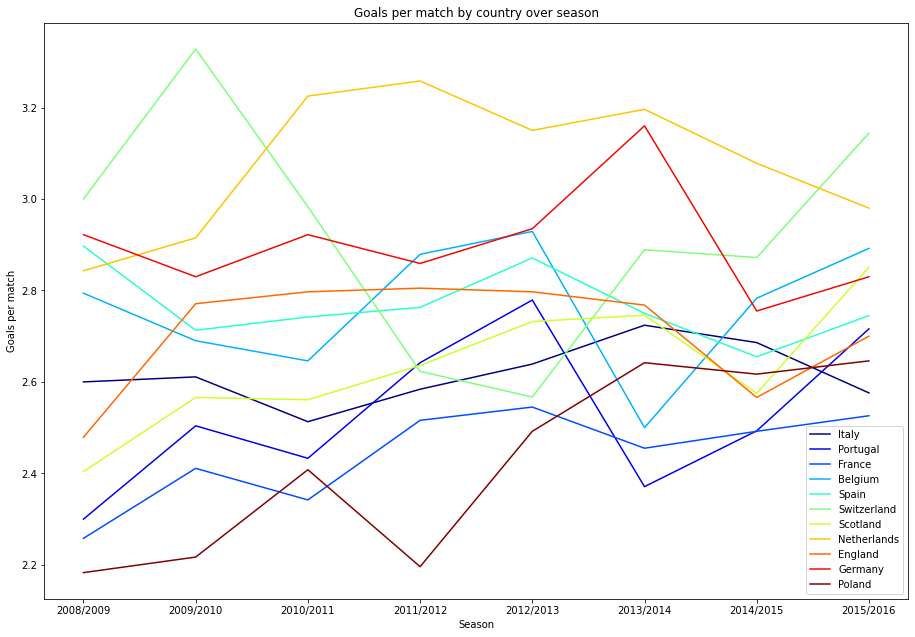

In [128]:
# plot the goals per match trend line over season by country level
ax1 = plt.axes([2,2,2,2])
labels = set(df2['Country'].values)
colors = plt.cm.jet(np.linspace(0,1,len(labels)))
for key, color in zip(labels, range(len(labels))):
    data_x = df2.loc[df2['Country']==key]['Season']
    data_y = df2.loc[df2['Country']==key]['Goals per match']
    ax1.plot(data_x, data_y, color=colors[color], label=key)
plt.legend()
plt.xlabel('Season')
plt.ylabel('Goals per match')
plt.title('Goals per match by country over season')

On average, Netherlands is the country holds the most goals per match. From 2011 to 2015, Switzerland faced a significant drop in its goals per match, which made it move from the leader to become left behind by other countries.

In [129]:
# Use data wrangling to filter Switzerland to view its matches' performance over season
df2.loc[df2['Country']=='Switzerland']

,Season,Country,League,Goals per match,Home team goals per match,Away team goals per match,Total goals,Total matches
0,2008/2009,Switzerland,Switzerland Super League,3.000,1.756,1.244,540,180
11,2009/2010,Switzerland,Switzerland Super League,3.328,1.994,1.333,599,180
23,2010/2011,Switzerland,Switzerland Super League,2.983,1.572,1.411,537,180
40,2011/2012,Switzerland,Switzerland Super League,2.623,1.451,1.173,425,162
52,2012/2013,Switzerland,Switzerland Super League,2.567,1.511,1.056,462,180
57,2013/2014,Switzerland,Switzerland Super League,2.889,1.611,1.278,520,180
67,2014/2015,Switzerland,Switzerland Super League,2.872,1.606,1.267,517,180
77,2015/2016,Switzerland,Switzerland Super League,3.144,1.783,1.361,566,180


In [130]:
# Use data wrangling to filter Netherlands to view its matches' performance over season
df2.loc[df2['Country']=='Netherlands']

,Season,Country,League,Goals per match,Home team goals per match,Away team goals per match,Total goals,Total matches
3,2008/2009,Netherlands,Netherlands Eredivisie,2.843,1.712,1.131,870,306
12,2009/2010,Netherlands,Netherlands Eredivisie,2.915,1.725,1.190,892,306
22,2010/2011,Netherlands,Netherlands Eredivisie,3.225,1.944,1.281,987,306
33,2011/2012,Netherlands,Netherlands Eredivisie,3.258,1.912,1.346,997,306
44,2012/2013,Netherlands,Netherlands Eredivisie,3.150,1.765,1.386,964,306
55,2013/2014,Netherlands,Netherlands Eredivisie,3.196,1.856,1.340,978,306
66,2014/2015,Netherlands,Netherlands Eredivisie,3.078,1.693,1.386,942,306
78,2015/2016,Netherlands,Netherlands Eredivisie,2.980,1.631,1.350,912,306


While the total matches remain the same by season in Netherlands and Switzerland, in Netherlands, the goals scored have been improved better over year.

## Research question 2: Player Reference: 
- Which zodiac signs account the most among the players in Europe by season?  
- Height and Weight distribution among players?
- What factors strongly correlate with the player's potential the most?

In [131]:
# Import data from table Player
df3 = pd.read_sql("select * from player", conn)

In [132]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11060 entries, 0 to 11059
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  11060 non-null  int64  
 1   player_api_id       11060 non-null  int64  
 2   player_name         11060 non-null  object 
 3   player_fifa_api_id  11060 non-null  int64  
 4   birthday            11060 non-null  object 
 5   height              11060 non-null  float64
 6   weight              11060 non-null  int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 605.0+ KB


In [133]:
# data wrangling to convert string data type into datetime
df3['birthday'] = pd.to_datetime(df3['birthday'])

In [134]:

def get_zodiac_of_date(date):
    """require date of birth to return zodiac sign"""
    zodiacs = [(120, 'Cap'), (218, 'Aqu'), (320, 'Pis'), (420, 'Ari'), (521, 'Tau'),
           (621, 'Gem'), (722, 'Can'), (823, 'Leo'), (923, 'Vir'), (1023, 'Lib'),
           (1122, 'Sco'), (1222, 'Sag'), (1231, 'Cap')]
    date_number = int("".join((str(date.month), '%02d' % date.day)))
    for z in zodiacs:
        if date_number <= z[0]:
            return z[1]

            
df3['Zodiac'] = df3['birthday'].apply(lambda x: get_zodiac_of_date(x))


Text(0, 0.5, 'Zodiac Sign')

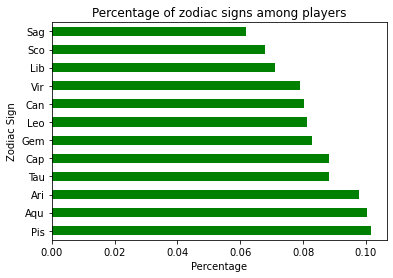

In [135]:
# plot percentage of players contributing to total by Zodiac Sign
df3['Zodiac'].value_counts(normalize=True).plot(kind = 'barh', color = 'g')
plt.title ('Percentage of zodiac signs among players')
plt.xlabel('Percentage')
plt.ylabel('Zodiac Sign')

In this chart, we can see that the percentage of players who are Pis is the largest, while Sag is the smallest.

In [136]:
df5 = pd.read_sql("select * from player_attributes", conn)

In [137]:
df5.corr()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,ball_control,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
id,1.000000,0.003368,0.001987,-0.002875,0.001217,-0.019149,-0.007882,-0.011295,-0.006132,-0.006343,-0.013890,-0.019309,-0.007608,-0.007382,-0.012919,-0.007633,-0.011118,-0.000874,-0.004240,-0.009445,-0.009725,-0.004160,-0.009816,-0.008251,-0.010012,-0.016650,-0.007730,-0.014541,-0.007731,-0.010620,-0.009555,-0.012196,-0.010689,0.013980,0.010436,0.008645,0.013563,0.014152
player_fifa_api_id,0.003368,1.000000,0.554620,-0.274089,-0.027619,-0.064183,-0.028010,-0.104655,-0.064219,-0.087743,0.049822,-0.051394,-0.108611,-0.112457,-0.023496,0.176840,0.176643,0.117608,-0.226008,0.007664,-0.077579,-0.072638,0.012026,-0.177467,-0.067155,-0.170696,-0.178182,-0.086235,-0.164171,-0.182479,-0.077979,-0.073212,-0.054321,-0.091737,-0.143113,-0.267489,-0.145119,-0.135443
player_api_id,0.001987,0.554620,1.000000,-0.322389,0.010991,-0.110620,-0.060387,-0.129488,-0.087320,-0.130140,0.018328,-0.097913,-0.150856,-0.138361,-0.051248,0.103051,0.095866,0.027631,-0.306165,0.021107,-0.123198,-0.141016,-0.108820,-0.232937,-0.117087,-0.210959,-0.188561,-0.107012,-0.188077,-0.164783,-0.089998,-0.086596,-0.072889,-0.071495,-0.128573,-0.238898,-0.128707,-0.124961
overall_rating,-0.002875,-0.274089,-0.322389,1.000000,0.766757,0.357699,0.329298,0.314099,0.458361,0.361470,0.354324,0.357772,0.349592,0.435018,0.444257,0.245655,0.254841,0.239896,0.769246,0.160364,0.427996,0.259023,0.327456,0.318661,0.392382,0.323934,0.250370,0.370019,0.431137,0.393189,0.133377,0.165349,0.128889,0.027976,0.004410,0.025682,0.005709,0.005687
potential,0.001217,-0.027619,0.010991,0.766757,1.000000,0.277755,0.286684,0.207706,0.382605,0.301302,0.338675,0.296073,0.263358,0.343716,0.401368,0.338044,0.340054,0.292950,0.580235,0.201974,0.325697,0.174819,0.260509,0.126931,0.312808,0.164815,0.165730,0.327829,0.378901,0.316414,0.055758,0.083822,0.063976,-0.011250,0.004742,0.089205,0.003406,0.003962
crossing,-0.019149,-0.064183,-0.110620,0.357699,0.277755,1.000000,0.576860,0.369747,0.790150,0.637891,0.809061,0.789132,0.707576,0.681959,0.807302,0.599012,0.579409,0.599248,0.384514,0.518518,0.656280,0.021320,0.564360,-0.070291,0.715925,0.323599,0.305952,0.682113,0.693227,0.571473,0.235159,0.285265,0.275467,-0.603898,-0.595610,-0.349559,-0.597625,-0.601580
finishing,-0.007882,-0.028010,-0.060387,0.329298,0.286684,0.576860,1.000000,0.373536,0.579365,0.851339,0.784659,0.691201,0.632248,0.337601,0.719709,0.528942,0.509506,0.554235,0.354473,0.394012,0.726982,0.008953,0.346688,-0.053048,0.806005,0.043714,-0.149366,0.798441,0.651455,0.720388,-0.284603,-0.229699,-0.260890,-0.479162,-0.465099,-0.287681,-0.470673,-0.473173
heading_accuracy,-0.011295,-0.104655,-0.129488,0.314099,0.207706,0.369747,0.373536,1.000000,0.548700,0.391638,0.400494,0.321120,0.307587,0.358634,0.551049,0.200077,0.267273,0.069220,0.295348,0.078953,0.540868,0.286803,0.477466,0.493051,0.406758,0.575705,0.452849,0.411554,0.337184,0.431336,0.461543,0.480624,0.441769,-0.665365,-0.647876,-0.391540,-0.647738,-0.651373
short_passing,-0.006132,-0.064219,-0.087320,0.458361,0.382605,0.790150,0.579365,0.548700,1.000000,0.640253,0.787994,0.732295,0.692461,0.797488,0.890042,0.503266,0.491380,0.510591,0.459289,0.461714,0.721767,0.060146,0.609956,0.092084,0.728791,0.453783,0.424288,0.677577,0.765336,0.609537,0.350171,0.415678,0.380990,-0.693313,-0.689528,-0.413317,-0.690702,-0.692926
volleys,-0.006343,-0.087743,-0.130140,0.361470,0.301302,0.637891,0.851339,0.391638,0.640253,1.000000,0.784366,0.752248,0.682751,0.414123,0.749557,0.513250,0.494090,0.559756,0.397233,0.415812,0.746484,0.023230,0.382649,-0.036108,0.814433,0.127922,-0

<AxesSubplot:xlabel='reactions', ylabel='potential'>

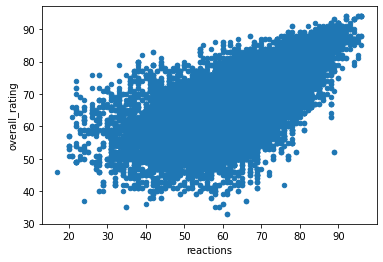

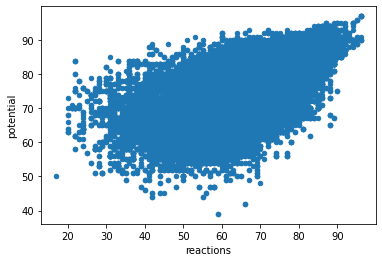

In [138]:
df5.plot(x='reactions',y='overall_rating', kind = 'scatter')
df5.plot(x='reactions',y='potential', kind = 'scatter')


There is a strong correlation between player's reactions and player's overall_rating and between player's reactions and player's overall_rating as well. As the overall_rating is highly weighted by player's potential, which is plausible, the player's reactions make a big impact on player's potential.

Text(0, 0.5, 'Frequency')

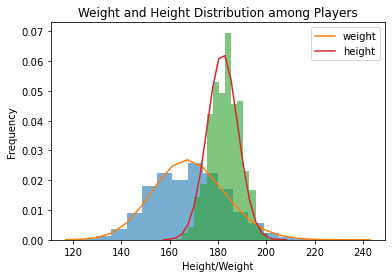

In [139]:
def pdfDistribution(arr):
    """Create function to plot the hist distribution combined with its best fit line - skew distribution""" 
    _,bins,_ = plt.hist(arr, 20, density = True, alpha =0.6)
    a, loc, scale = stats.skewnorm.fit(arr)
    best_fit_line = stats.skewnorm.pdf(bins, a, loc, scale)    
    return plt.plot(bins, best_fit_line)

pdfDistribution(df3['weight'])
pdfDistribution(df3['height'])
plt.legend(['weight', 'height'])
plt.title('Weight and Height Distribution among Players')
plt.xlabel('Height/Weight')
plt.ylabel('Frequency')



In the chart above, the avg height of players is 183m and the average weight of players is 163 Lbs.

## Research question 3: Team Reference: Is there any statistically significant difference in the performance between home team and away team? 


In this section, we will use the metric: win rate of each team to evaluate the performance when the team be home team and away team. 
Methodology: 
- Create 1 column to define win match indicator for each team by match_id level
  - Win: 1
  - Draw or loose: 0
- Each column will be treated as iid random variables (identical and independent random variable) as the result of each team in each match is independent and identical, presented as array [0,1,..0,1] - received only 2 values 1: win, 0: not win
- Each array (home win rate or away win rate) will follow Binomial distribution. 
- According to Central Limit Theorem, regardless of what distribution of the population, the sampling distribution of the mean will follow Normal distribution. 
  - Use this theory to compare the mean of home team and away team. 
- Use t-test to test the difference between the 2 means is statistically significant difference. 

In [140]:
match = pd.read_sql("select * from match", conn)

In [141]:
df4 = match.iloc[:,:11]


Text(0, 0.5, 'Frequency')

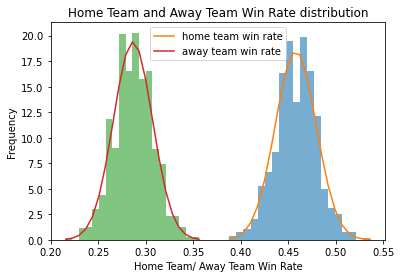

In [142]:
def winRate(arr1,arr2): 
    """Function to add column to indicate win match of each team"""
    arr = arr1 > arr2
    arr = arr.apply(lambda x: 1 if x == True else 0)
    return arr
df4['home team win rate'] = winRate(df4['home_team_goal'], df4['away_team_goal'])
df4['away team win rate'] = winRate(df4['away_team_goal'], df4['home_team_goal'])

def Bootstraping(arr): 
    """Use Bootstrapping method to collect mean of each resample for each team"""
    list_mean = []
    for _ in range(1000):
        mean = np.random.choice(arr, 500, replace = True).mean()
        list_mean.append(mean)    
    return np.array(list_mean)

home_team_win_rate = Bootstraping(df4['home team win rate'])
away_team_win_rate = Bootstraping(df4['away team win rate'])

def Normaldistribution(arr): 
    """PLot the Normal distribution as a result of Central Limit Theorem"""
    _,bins,_ = plt.hist(arr, 20, density = True, alpha = 0.6)
    mu, sigma = stats.norm.fit(arr)
    best_fit_line = stats.norm.pdf(bins, mu, sigma)
    return plt.plot(bins, best_fit_line)

Normaldistribution(home_team_win_rate)
Normaldistribution(away_team_win_rate)
plt.legend(['home team win rate', 'away team win rate'])
plt.title('Home Team and Away Team Win Rate distribution')
plt.xlabel('Home Team/ Away Team Win Rate')
plt.ylabel('Frequency')


As the chart show that, while the mean of home team win rate is 0.46, the mean of away team win rate is 0.29. Home team win rate is remarkably larger than the away team win rate. 
To test this difference is statistically significant or not, we use t-test to test the difference between the 2 means. 
T_test theoretical analysis: 
- The t-test quantifies the difference between the arithmetic means of the two samples.
- The null hypothesis is that there is no statistically significant difference between the 2 means. 
- Whether or not reject the null hypothesis is based on p_value and the theshold alpha (0.05 or 0.1). If the p_value is greater than the threshold, the probability that we can observe the proof for the null hypothesis is significant that we can not reject the null hypothesis (H0).
- The statistic is calculated as (np.mean(a) - np.mean(b))/se, where se is the standard error.
  



In [143]:
stats.ttest_ind(home_team_win_rate, away_team_win_rate)

Ttest_indResult(statistic=181.43392713077387, pvalue=0.0)

For the test result, we have p_value is 0.0, which means that the probability is very small. Hence, the difference between the 2 means we observe is not by chance, the home team will perform better than the away team as they play in their home field.

<a id='conclusion'></a>
## Conclusion

 1. Country Reference: Which country host the most matches by year? Which contry hold the most goals over year? 
   Over years, from season 2008 to 2016, England, France, Italy and Spain remained the top countries which hosted the most matches (380 matches).    
   On average, Netherlands is the country holds the most goals per match.
 2. Player Reference: Which zodiac signs account the most among the players in Europe by season? Height and Weight distribution among players? What factors strongly correlate with the player's potential the most?
   Pisces is the Zodiac Sign that most players belong to. The average weight among players is 163 Lbs, height is 183m.
   Factors that strongly correlate with the player's potential the most is the player's reaction factor, which decide the ability to determine opportunities and threats on the field, react within a split second.
 3. Team reference: Is there significant difference in performance between home team and away team? (Bivariate analysis)
    There is significant difference in performance between home team and away team as the home team has average win rate of 0.46 while away team is just 0.29, which means the home team will possibly gain their advantage when play in their home field.